In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import os
print(os.getcwd())


c:\Users\eugen\Desktop\Repo\General Python Exercises\House price predection project\notebooks


In [3]:
df1 = pd.read_csv("../data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
''' 
 groupby("location") -- DataFrameGroupBy object, which holds all columns grouped by location
 
 It doesnt return anything directly viewable, it gives you a GroupBy object, which can then use to perform operations like:
        1. Aggregation
        2. Filtering 
        3. Iteration
        
df.groupby("location").count()
df.groupby("location").size()
df.groupby("location").mean(numeric_only=True)

for location, group in df.groupby("location"): or for key, value in df.groupby("location"), key = location (i.e., London), value = DataFrame of all rows where location == "London"
        print(f"Location: {location}")
 
df.groupby("location").["location"] -- Now you're grouping by the location column, and you're selecting the location column to apply something
Now working with a Series GroupBy object instead of a DataFrameGroupBy 

df.groupby("location")["location"].count()

'''

df1.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(["area_type", "availability", "society"], axis=1)

In [7]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [10]:
df2.fillna({
        "balcony": df2["balcony"].median()
}, inplace=True)

In [11]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 6)

In [14]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3["bedroom"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))

C:\Users\eugen\AppData\Local\Temp\ipykernel_20576\3084995099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bedroom"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df3

,location,size,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [17]:
df3["bedroom"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
df4 = df3.drop(["size"], axis=1)
df4

,location,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.0,231.00,5
13316,Richards Town,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [19]:
df4[df4.bedroom > 15]

,location,total_sqft,bath,balcony,price,bedroom
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
3379,1Hanuman Nagar,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,2.0,550.0,16
4684,Munnekollal,2400,40.0,0.0,660.0,43
11559,1Kasavanhalli,1200,18.0,2.0,200.0,18


In [20]:
df4["balcony"].unique()

array([1., 3., 2., 0.])

In [21]:
df4.dtypes

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
bedroom         int64
dtype: object

In [22]:
df4["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [23]:
def is_float(x):
        try:
                float(x)
        except:
                return False
        return True

In [24]:
df4[~df4["total_sqft"].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bedroom
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [25]:
len(df4[~df4["total_sqft"].apply(is_float)])

190

In [26]:
def convert_sqft_to_num(x):
        tokens = x.split('-')
        if len(tokens)==2:
                return (float(tokens[0]) + float(tokens[1]))/2
        try:
                return float(x)
        except:
                return None

In [27]:
convert_sqft_to_num('1234-1255')

1244.5

In [28]:
convert_sqft_to_num('1236')

1236.0

In [29]:
convert_sqft_to_num('4125Perch')

In [30]:
df5 = df4.copy()
df5["total_sqft"] = df5["total_sqft"].apply(convert_sqft_to_num)
df5.head(10)

,location,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,2.0,370.00,6


In [31]:
df5.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
bedroom        0
dtype: int64

In [32]:
df5 = df5.dropna()
df5.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bedroom       0
dtype: int64

In [33]:
df5.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bedroom         int64
dtype: object

In [34]:
df5.shape

(13200, 6)

<Axes: xlabel='total_sqft', ylabel='Count'>

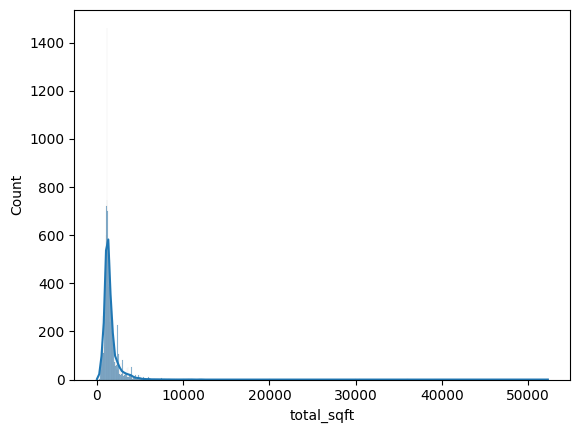

In [35]:
sns.histplot(data=df5, x="total_sqft", kde=True)

<Axes: xlabel='bath', ylabel='Count'>

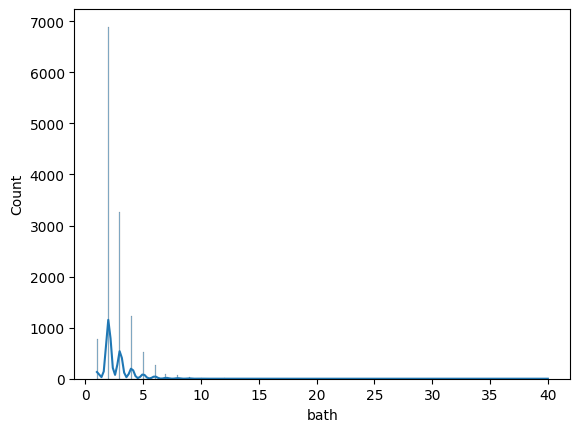

In [36]:
sns.histplot(data=df5, x="bath", kde=True)

<Axes: xlabel='balcony', ylabel='Count'>

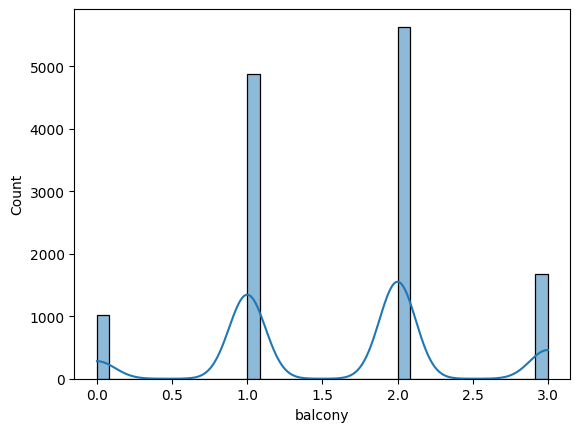

In [37]:
sns.histplot(data=df5, x="balcony", kde=True)

<Axes: xlabel='bedroom', ylabel='Count'>

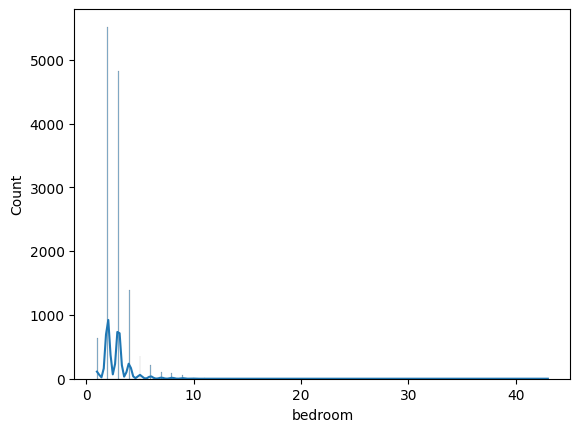

In [38]:
sns.histplot(data=df5, x="bedroom", kde=True)

<Axes: xlabel='price', ylabel='Count'>

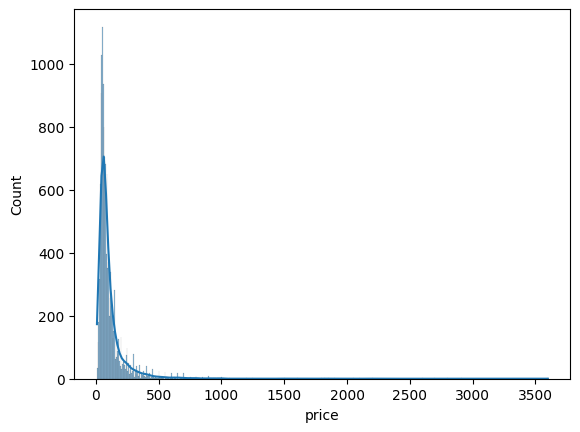

In [39]:
sns.histplot(data=df5, x="price", kde=True)

In [40]:
df6 = df5.copy()
df6["price_per_sqft"] = df6["price"]*100000 / df6["total_sqft"]
df6

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [41]:
df7 = df6.copy()
df7.location = df6.location.apply(lambda x: x.strip())
location_stats = df7.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
beml layout, basaveshwara nagar      1
basaveshwarnagar                     1
1 Giri Nagar                         1
4 Bedroom Farm House in Bagalur      1
3rd Stage Raja Rajeshwari Nagar      1
Name: location, Length: 1287, dtype: int64

In [42]:
df7["location"].value_counts().sort_values(ascending=False)

location
Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
KAMAKIYA                             1
Wheelers Road                        1
MM Layout                            1
beml layout, basaveshwara nagar      1
Sadhguru Layout                      1
Name: count, Length: 1287, dtype: int64

In [43]:
len(location_stats[location_stats<=10])

1047

In [44]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
1st Block Koramangala              10
Thyagaraja Nagar                   10
Ganga Nagar                        10
Nagappa Reddy Layout               10
Gunjur Palya                       10
                                   ..
beml layout, basaveshwara nagar     1
basaveshwarnagar                    1
1 Giri Nagar                        1
4 Bedroom Farm House in Bagalur     1
3rd Stage Raja Rajeshwari Nagar     1
Name: location, Length: 1047, dtype: int64

In [45]:
df8 = df7.copy()
df8.location = df8.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df8.location.unique())

241

In [46]:
df8[df8.total_sqft / df8.bedroom < 300]

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
9,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,2.0,218.0,7,15571.428571
13279,other,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [47]:
df9 = df8[~(df8.total_sqft / df8.bedroom < 300)]
df9

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [48]:
df9 = df9[df9.bath < df9.bedroom+2] # remove rows where number of bathrooms are +2 more than number of bedroom, removing outliers due to domain knowledge

In [49]:
df9.shape

(12303, 7)

In [50]:
def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for key, subdf in df.groupby('location'):
                m = np.mean(subdf.price_per_sqft)
                st = np.std(subdf.price_per_sqft)
                reduced_df = subdf[(subdf.price_per_sqft>(m-1*st)) & (subdf.price_per_sqft<=(m+1*st))]
                df_out = pd.concat([df_out,reduced_df], ignore_index=True)
        return df_out

df10 = remove_pps_outliers(df9)
df10.shape

(10115, 7)

In [51]:
len(df10.location.unique())

241

In [52]:
def remove_bedroom_outliers(df):
        exclude_indices = np.array([])
        for location, location_df in df.groupby('location'):
            bedroom_stats = {}
            for bedroom, bedroom_df in location_df.groupby('bedroom'):
                bedroom_stats[bedroom] = {
                        'mean': np.mean(bedroom_df.price_per_sqft),
                        'std': np.std(bedroom_df.price_per_sqft),
                        'count': bedroom_df.shape[0]
                }        
            for bedroom, bedroom_df in location_df.groupby('bedroom'):
                    stats = bedroom_stats.get(bedroom-1)
                    if stats and stats['count']>5:
                            exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)
        return df.drop(exclude_indices, axis='index')

df11 = remove_bedroom_outliers(df10)
df11.shape

(7227, 7)

In [53]:
test_grouped = df11.groupby('location').size().sort_values(ascending=True)
test_grouped

location
Marsur                      3
2nd Stage Nagarbhavi        4
HAL 2nd Stage               4
Banjara Layout              4
Vishwapriya Layout          4
                         ... 
Raja Rajeshwari Nagar     140
Electronic City           162
Sarjapur  Road            186
Whitefield                239
other                    1124
Length: 241, dtype: int64

In [54]:
df11.location.head(10)

0     1st Block Jayanagar
1     1st Block Jayanagar
2     1st Block Jayanagar
3     1st Block Jayanagar
4     1st Block Jayanagar
5     1st Block Jayanagar
6     1st Block Jayanagar
8      1st Phase JP Nagar
9      1st Phase JP Nagar
10     1st Phase JP Nagar
Name: location, dtype: object

In [55]:
df11.describe()

,total_sqft,bath,balcony,price,bedroom,price_per_sqft
count,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000
mean,1468.664108,2.409990,1.561505,95.954441,2.480559,6074.797679
std,813.347856,0.935078,0.782578,87.139860,0.904062,2353.878968
min,300.000000,1.000000,0.000000,10.000000,1.000000,1300.000000
25%,1092.000000,2.000000,1.000000,50.000000,2.000000,4583.687040
50%,1255.000000,2.000000,2.000000,72.000000,2.000000,5653.846154
75%,1652.750000,3.000000,2.000000,110.000000,3.000000,6837.606838
max,30000.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [56]:
df11.shape

(7227, 7)

In [57]:
len(df11.location.unique())

241

In [58]:
grouped_test = df11.groupby('location')['price'].agg('mean').sort_values()
grouped_test

location
Chandapura                      25.044508
Ananth Nagar                    27.985600
Attibele                        28.695000
Bommasandra Industrial Area     32.679231
Anekal                          32.919048
                                  ...    
Rajaji Nagar                   291.981818
Benson Town                    301.111111
HAL 2nd Stage                  361.250000
Giri Nagar                     402.428571
Cunningham Road                744.555556
Name: price, Length: 241, dtype: float64

In [59]:
# for loc, group in df10.groupby("location")["price"]:
#         print(f"Location: {loc}")
#         print(group.head())

In [60]:
df11.head()

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [61]:
df11.shape

(7227, 7)

Text(0, 0.5, 'Count')

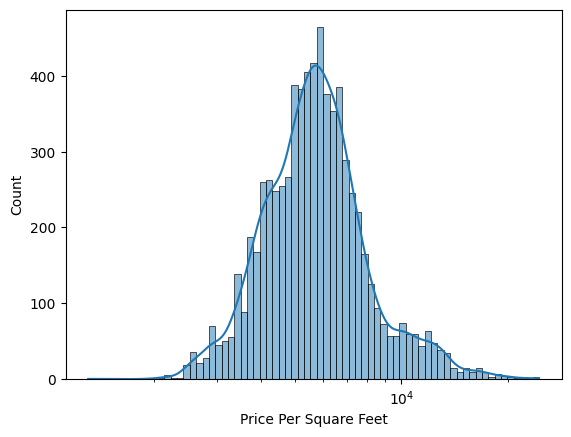

In [62]:
sns.histplot(data=df11, x="price_per_sqft", kde=True, bins='auto', log_scale=True)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

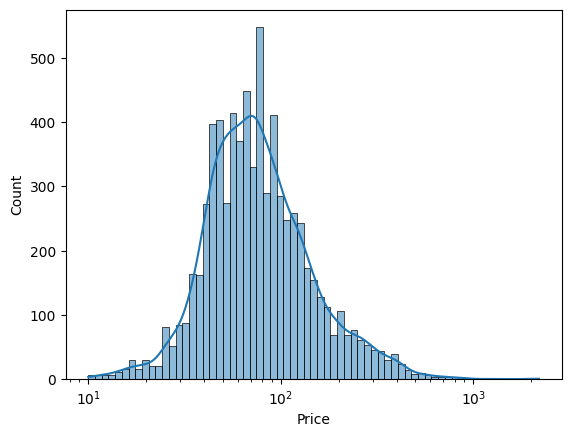

In [63]:
sns.histplot(data=df11, x="price", kde=True, bins='auto', log_scale=True)
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

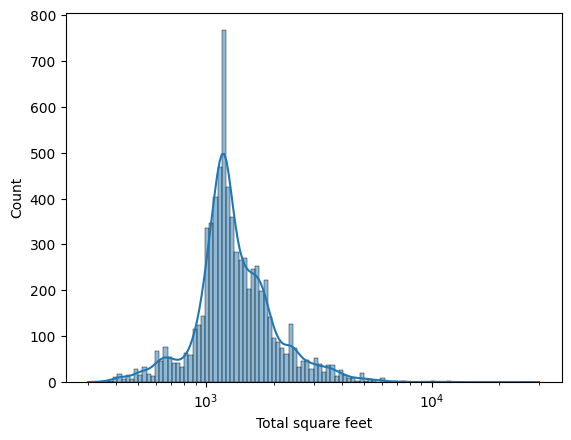

In [64]:
sns.histplot(data=df11, x="total_sqft", kde=True, bins='auto', log_scale=True)
plt.xlabel('Total square feet')
plt.ylabel('Count')

In [65]:
df11.location.value_counts().sort_values()

location
Marsur                      3
HAL 2nd Stage               4
2nd Stage Nagarbhavi        4
Banjara Layout              4
Nagasandra                  4
                         ... 
Raja Rajeshwari Nagar     140
Electronic City           162
Sarjapur  Road            186
Whitefield                239
other                    1124
Name: count, Length: 241, dtype: int64

In [66]:
df11.shape

(7227, 7)

In [67]:
df12 = df11.drop(["price_per_sqft", "balcony"], axis=1)

In [68]:
df12.head()

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [71]:
df12.to_csv("../data/cleaned_data.csv", index=False)

In [72]:
dummies = pd.get_dummies(df12.location, drop_first=True)
dummies

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10110,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [73]:
df13 = pd.concat([df12,dummies], axis=1)
df13

,location,total_sqft,bath,price,bedroom,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10107,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10110,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10111,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [74]:
df14 = df13.drop(["location"], axis=1)
df14

,total_sqft,bath,price,bedroom,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10107,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10110,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10111,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [75]:
X = df14.drop('price', axis=1)
X.head()

,total_sqft,bath,bedroom,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
y = df14.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [78]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8533062829616287

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scores = cross_val_score(LinearRegression(), X, y, cv=cv)
print(scores)
print(scores.mean())

[0.82524703 0.79874538 0.81786798 0.8517774  0.79079895]
0.8168873474487555


In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [81]:
from IPython.display import display 

model_params = {
    'linear_regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ]),
        'params': {
            'model__fit_intercept': [True,False],
            'scaler': [StandardScaler(), MinMaxScaler()]
        }
    },
    'lasso': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('model', Lasso())
        ]),
        'params' : {
            'model__alpha': [0.1,1,2],
            'model__selection': ['random', 'cyclic'],
            'scaler': [StandardScaler(), MinMaxScaler()]
        }
    },
    # 'ridge': {
    #     'model': Pipeline([
    #         ('scaler', StandardScaler()),
    #         ('model', Ridge()),
    #     ]),
    #     'params' : {
    #         'model__alpha': [0.1,1,2],
    #         'scaler': [StandardScaler(), MinMaxScaler()]
    #     }
    # },
    # 'random_forest': {
    #     'model': RandomForestRegressor(random_state=0),
    #     'params' : {
    #         'n_estimators': [50,100],
    #         'criterion': ["squared_error"]
    #     }
    # },
    "decision_trees": {
        "model": DecisionTreeRegressor(random_state=0),
        "params": {
             "criterion": ['squared_error', 'friedman_mse'],
             "splitter": ["best", "random"],
             "max_depth": [None,5,10,20]    
        }
    }
}

scores = []
best_models = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for model_name, model_parameters in model_params.items():
    clf =  GridSearchCV(model_parameters['model'], model_parameters['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    best_models[model_name] = clf.best_estimator_
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',500)
df



,model,best_score,best_params
0,linear_regression,0.816887,"{'model__fit_intercept': True, 'scaler': StandardScaler()}"
1,lasso,0.813845,"{'model__alpha': 0.1, 'model__selection': 'random', 'scaler': StandardScaler()}"
2,decision_trees,0.749188,"{'criterion': 'friedman_mse', 'max_depth': None, 'splitter': 'random'}"


In [82]:
best_model_name = df.sort_values('best_score', ascending=False).iloc[0]['model']
best_model = best_models[best_model_name]
best_model

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [84]:
linear_model = best_models['linear_regression']
lasso_model = best_models['lasso']
# ridge_mdoel = best_models['ridge']
decision_tree_model = best_models['decision_trees']
#random_forest_model = best_models['random_forest']

In [85]:
df[df['model']=="random_forest"].best_params.values

array([], dtype=object)

In [86]:
df[df['model']=="decision_trees"].best_params.values

array([{'criterion': 'friedman_mse', 'max_depth': None, 'splitter': 'random'}],
      dtype=object)

In [87]:
X.columns

Index(['total_sqft', 'bath', 'bedroom', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=243)

In [88]:
def predict_price(location,sqft,bath,bedroom):
        loc_index = np.where(X.columns==location)[0][0]
        
        x = np.zeros(len(X.columns))
        x[0] = sqft
        x[1] = bath
        x[2] = bedroom
        if loc_index >=0:
                x[loc_index] = 1
        return linear_model.predict([x])[0]   # Replace best_model with any other model i.e., linear_model or lr_clf

In [89]:
float(predict_price('1st Phase JP Nagar', 1000, 2, 2))

c:\Users\eugen\Desktop\Repo\General Python Exercises\eugen-venv-test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


86.1776426093933

In [90]:
float(predict_price('1st Phase JP Nagar', 1000, 2, 3))

c:\Users\eugen\Desktop\Repo\General Python Exercises\eugen-venv-test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


84.13082421162588

In [91]:
float(predict_price('Indira Nagar', 1000, 2, 2))

c:\Users\eugen\Desktop\Repo\General Python Exercises\eugen-venv-test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


180.2686325623664

In [92]:
float(predict_price('Indira Nagar', 1000, 3, 3))

c:\Users\eugen\Desktop\Repo\General Python Exercises\eugen-venv-test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


181.32153983757462

In [93]:
float(predict_price('other', 1000, 2, 2))

c:\Users\eugen\Desktop\Repo\General Python Exercises\eugen-venv-test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


79.49670212034813

In [ ]:
# import pickle
# with open ('banglore_home_prices_model.pickle', 'wb') as f:
#         pickle.dump(linear_model,f)

In [95]:
# import json
# columns = {
#         'data_columns': [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#         f.write(json.dumps(columns))